In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import os.path
if not os.path.exists('mlp_helper.py'):
    !wget https://github.com/lab-ml-itba/MLP-2019/raw/master/mlp_helper.py

--2020-11-18 23:52:29--  https://github.com/lab-ml-itba/MLP-2019/raw/master/mlp_helper.py
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lab-ml-itba/MLP-2019/master/mlp_helper.py [following]
--2020-11-18 23:52:29--  https://raw.githubusercontent.com/lab-ml-itba/MLP-2019/master/mlp_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13863 (14K) [text/plain]
Saving to: ‘mlp_helper.py’

mlp_helper.py       100%[===================>]  13.54K  --.-KB/s    in 0s      

2020-11-18 23:52:29 (81.7 MB/s) - ‘mlp_helper.py’ saved [13863/13863]



In [3]:
from mlp_helper import plot_boundaries_keras, get_dataset, plot_boundaries, draw_neural_net, return_weights_notation, get_dataset_2
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 

# Pruebas a realizar:
- hidden_units en 2 y 3
- Cambiar funcion de activación de la capa oculta: Sigmoid, Relu, Linear

# Dataset

In [4]:
hidden_units = 5

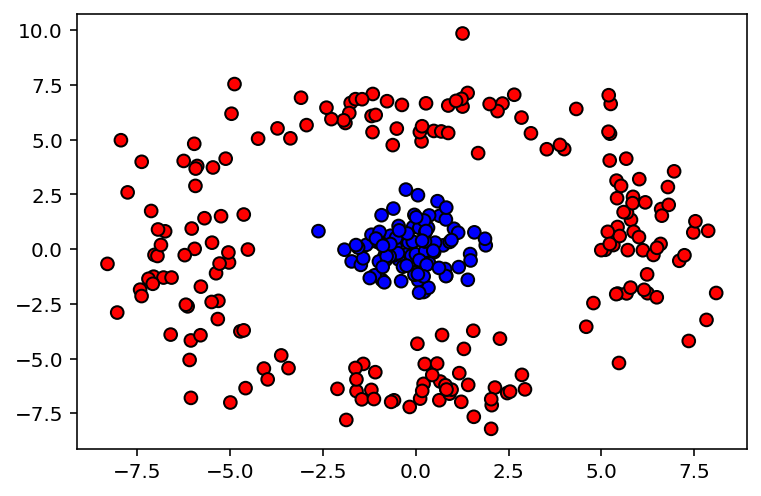

In [5]:
if hidden_units==2:
    X, y = get_dataset()
else:
    X, y = get_dataset_2()
plot_boundaries(X, y)

# Modelo: Red neuronal con 1 capa oculta

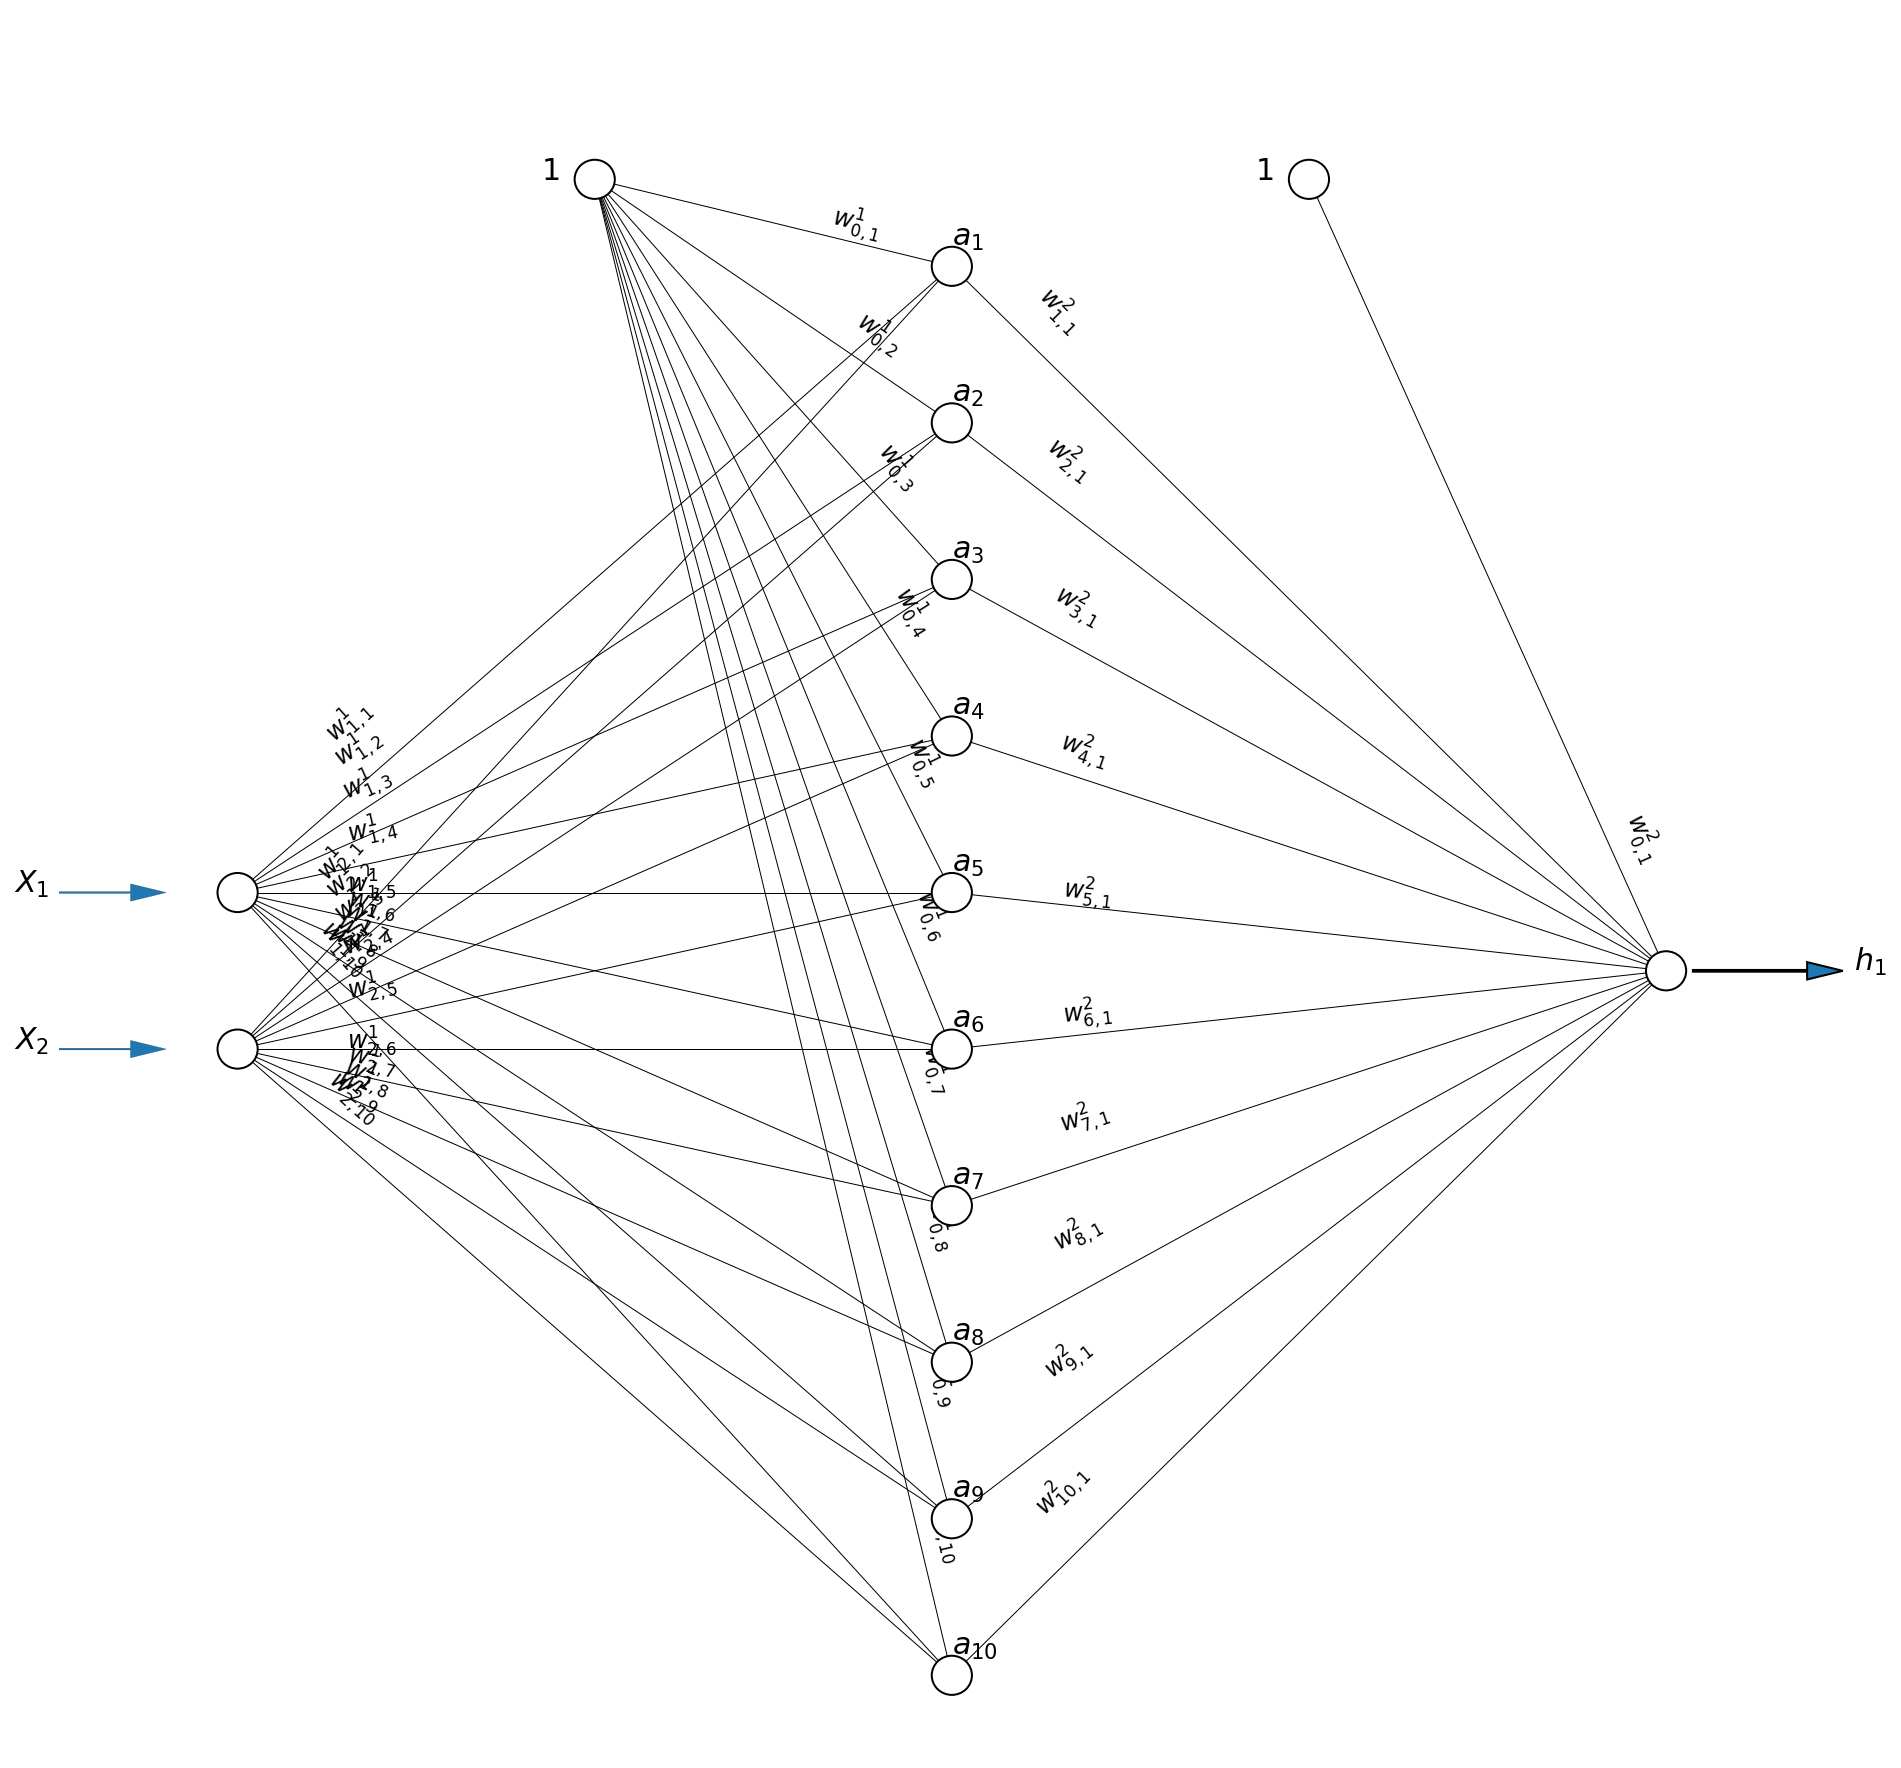

In [6]:
input_dim = 2

fig, ax = plt.subplots(1,1,figsize=(16, 16))
shape = [input_dim,10,1]
weights, biases = return_weights_notation(shape)
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, shape, weights, biases, line_width=0.5)

In [7]:
from keras.models import Sequential
from keras.layers import Dense

### Selección de función de activación
https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e

In [8]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [9]:
def plot_act(activ):
    t = np.linspace(-10, 10, 100)
    plt.plot(t, activ(t))
    plt.show()

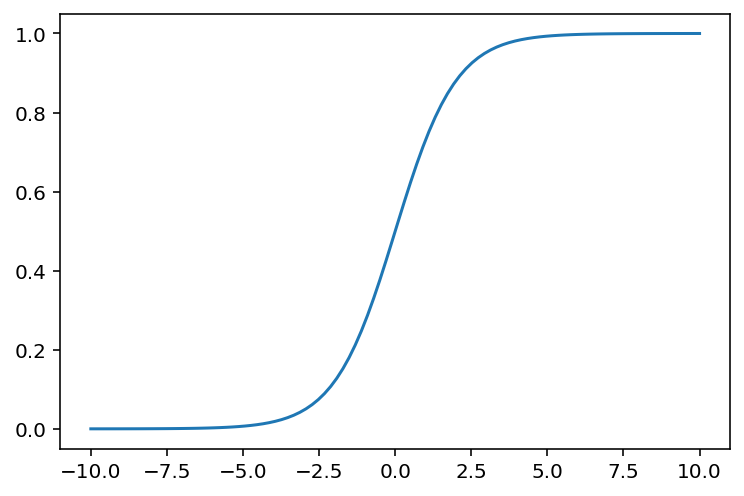

In [10]:
plot_act(sigmoid)

In [34]:
activation = 'relu' # linear, tanh, relu, tanh, sigmoid

In [35]:
model = Sequential()
model.add(Dense(hidden_units, input_shape=(input_dim,), activation=activation))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________


In [36]:
from keras.optimizers import Adam, SGD
model.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
model.evaluate(X, y)

10/10 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5600


[0.713144838809967, 0.5600000023841858]

In [39]:
weights = model.get_weights()
print(weights)

[array([[ 0.01196879,  0.16077638, -0.6132498 ,  0.36900997,  0.6592622 ],
       [-0.09129304, -0.19912362,  0.05155563, -0.51931965,  0.25553012]],
      dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32), array([[ 0.43597347,  0.14604485, -0.4825901 ,  0.3961237 ,  0.25460732,
        -0.38492823, -0.21503633,  0.5832719 ,  0.20382321, -0.02540058],
       [-0.6025367 ,  0.5035501 , -0.23305866,  0.39095777,  0.36854964,
        -0.08465874,  0.3458889 , -0.26762012, -0.5585782 , -0.10997748],
       [-0.4955586 , -0.37531194, -0.36620924, -0.01070738, -0.3708635 ,
         0.06114531, -0.03925329, -0.28324822,  0.2555231 , -0.42050284],
       [-0.07598686,  0.09462458,  0.19803393, -0.55869114, -0.41288483,
         0.10691661, -0.5309981 ,  0.3198449 , -0.05003488, -0.11209649],
       [-0.17322928,  0.5239168 ,  0.5399845 , -0.15077272,  0.48811275,
         0.27334124,  0.04475635, -0.19414315, -0.23545936, -0.25140005]],
      dtype=float32), array([0., 0., 0., 0., 0.,

In [40]:
weights[0].shape, X[0:1].shape

((2, 5), (1, 2))

In [41]:
i = 1
sigmoid(np.dot(sigmoid(
    np.dot(X[i:i+1], weights[0]) + weights[1]), weights[2]) + weights[3])

array([[0.39551448, 0.63062341, 0.49054775, 0.51198431, 0.57844848,
        0.509093  , 0.46898627, 0.50374841, 0.44267255, 0.38847685]])

In [42]:
model.predict(X[i:i+1])

array([[0.4273784]], dtype=float32)

## Para recordar:

- Una red neuronal es la concatenación de capas
- Cada capa hace el producto entre el vector fila de entrada con la matriz de pesos, le suma el bias y luego aplica función de activación

# Entrenamiento

In [43]:
model.fit(X, y, epochs=500, verbose=0)

10/10 [==============================] - 0s 1ms/step - loss: 6.7264e-06 - accuracy: 1.0000


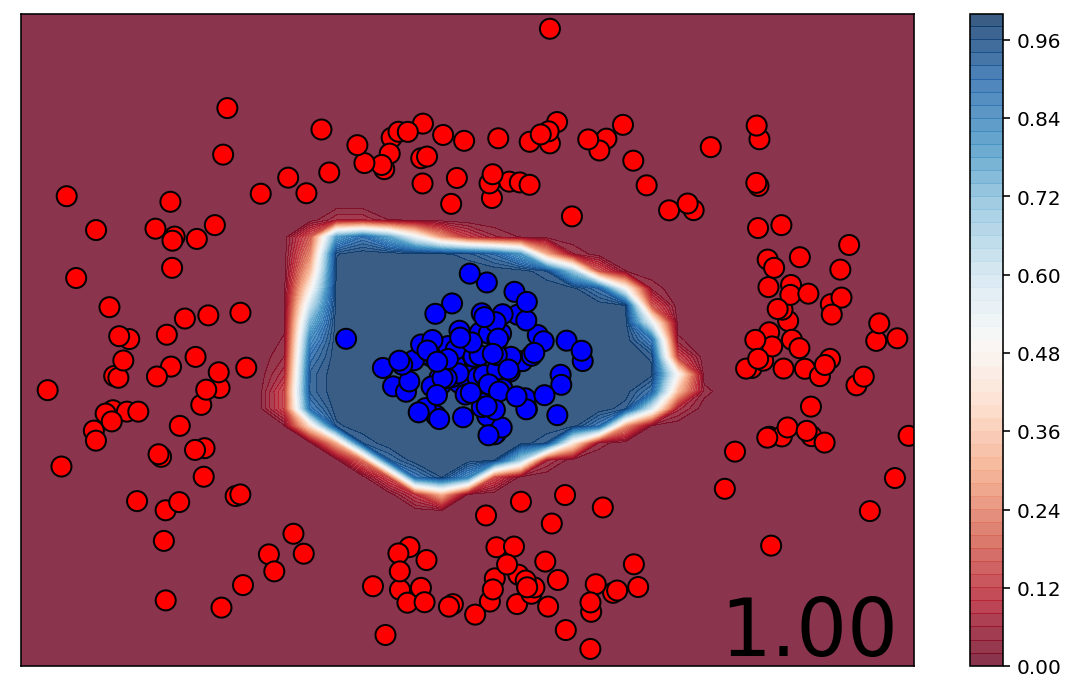

In [44]:
plt.figure(figsize=(10,6))
plot_boundaries_keras(X, y, model.evaluate(X,y)[1], probability_func=model.predict_proba, h=0.5)

In [45]:
model.predict_proba(X).shape

(300, 1)

## Obtenemos pesos de primera capa
### Pesos aprendidos

In [46]:
model.get_weights()

[array([[-0.5744071 ,  0.01055366, -0.39899933,  0.6643296 ,  0.39845416],
        [-0.12136396, -0.54457295,  0.42825153, -0.4486745 ,  0.66284376]],
       dtype=float32),
 array([-1.000613  , -0.77788043, -1.0938008 , -1.0039371 , -1.2108469 ],
       dtype=float32),
 array([[-0.49008298,  1.1683483 , -0.7716858 , -0.8522729 ,  0.9975978 ,
         -1.463802  , -0.8608589 ,  1.1457568 , -1.0509658 ,  0.782362  ],
        [-1.0906519 ,  1.1324149 , -0.9790196 , -0.70574385,  0.96770334,
         -1.2043989 , -0.4995253 ,  0.392374  , -1.1412774 ,  0.481956  ],
        [-0.9512815 ,  0.31111863, -0.851696  , -0.5754641 ,  0.19039828,
         -0.5264087 , -0.42001516,  0.12609674, -0.385064  ,  0.24912043],
        [-0.5953565 ,  0.66398215, -0.610317  , -1.0273545 ,  0.31073585,
         -0.8482768 , -0.92706877,  0.7150227 , -0.654218  ,  0.4483114 ],
        [-0.6065784 ,  1.0591043 , -0.75272995, -0.8547241 ,  0.9769595 ,
         -1.1709868 , -0.5664196 ,  0.43485188, -0.967761  

In [23]:
# Nos quedamos con los pesos de la primer capa
layer_1_w = model.get_weights()[0]
layer_1_b = model.get_weights()[1]
print(layer_1_w)
print(layer_1_b)

[[-0.46917808  0.6823002   1.3547642   0.26073843 -0.4086509 ]
 [ 0.62383235  0.41093424 -0.53584987 -0.20614503 -0.8738335 ]]
[-0.7483687  -0.93606627 -0.71663517  1.888135   -0.6443791 ]


In [24]:
# Preparo los pesos a asignar a un "submodelo" de "regresión logistica"
model_1_weights = [np.array([layer_1_w[:,0]]).T, np.array([layer_1_b[0]])]
print(model_1_weights)

[array([[-0.46917808],
       [ 0.62383235]], dtype=float32), array([-0.7483687], dtype=float32)]


In [25]:
# Construimos el submodelo
model_1 = Sequential()
model_1.add(Dense(1, input_shape=(2,), activation=activation))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Le asginamos los pesos al submodelo
model_1.set_weights(model_1_weights)
model_1.compile(Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])

10/10 [==============================] - 0s 1ms/step - loss: 8.4767 - accuracy: 0.3967


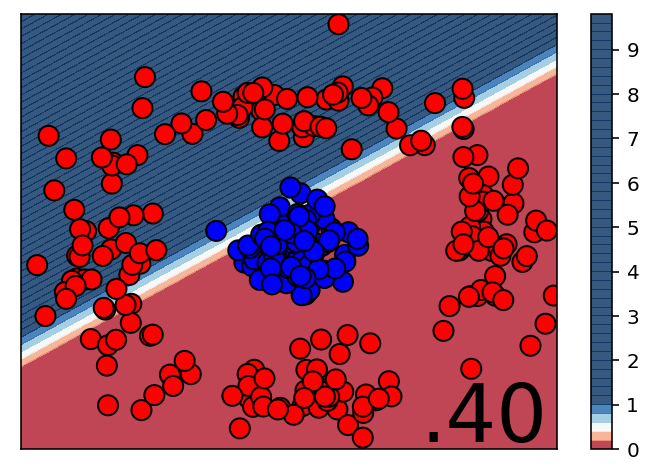

In [27]:
plot_boundaries_keras(X, y, model_1.evaluate(X,y)[1], probability_func=model_1.predict_proba, h=0.5)

### Generalizo función para armar submodelo
Y grafico los dos submodelos

In [28]:
def get_sub_model(model, index, idx1=0, idx2=1, activation='sigmoid', input_dim=2):
    layer_1_w = model.get_weights()[idx1]
    layer_1_b = model.get_weights()[idx2]
    sub_model_weights = [np.array([layer_1_w[:,index]]).T, np.array([layer_1_b[index]])]
    sub_model = Sequential()
    sub_model.add(Dense(1, input_shape=(input_dim,), activation=activation))
    sub_model.set_weights(sub_model_weights)
    sub_model.compile(Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return sub_model

### Graficamos las rectas aprendidas por los submodelos

10/10 [==============================] - 0s 1ms/step - loss: 8.2510 - accuracy: 0.4133


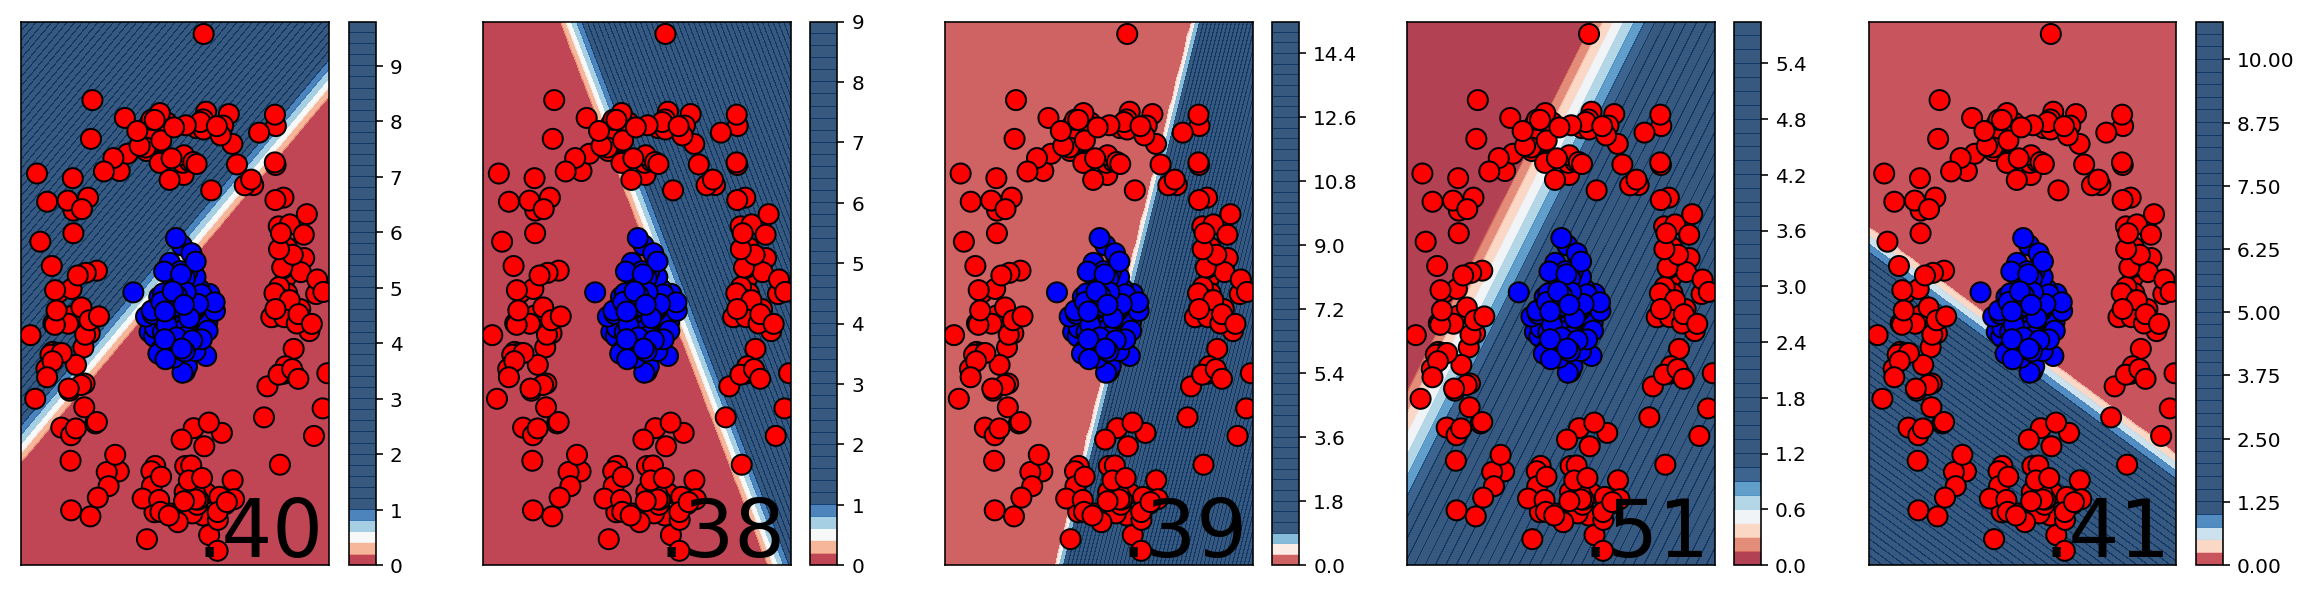

In [29]:
f, ax = plt.subplots(1, hidden_units, figsize=(20,5))
sub_models = []

# Para el mesh-grid
N = 300
X1 = np.linspace(X[:, 0].min(), X[:, 0].max(), N)
X2 = np.linspace(X[:, 1].min(), X[:, 1].max(), N)

X1, X2 = np.meshgrid(X1, X2)
Z_lr_array = []

for i in range(hidden_units):
    sub_model = get_sub_model(model, i, activation=activation)
    sub_models.append(sub_model)
    Z_lr = sub_model.predict_proba(np.c_[X1.ravel(), X2.ravel()])[:, 0]
    Z_lr = Z_lr.reshape(X1.shape)
    Z_lr_array.append(Z_lr)
    plot_boundaries_keras(X, y, sub_model.evaluate(X,y)[1], probability_func=sub_model.predict_proba, ax=ax[i], h=0.5)

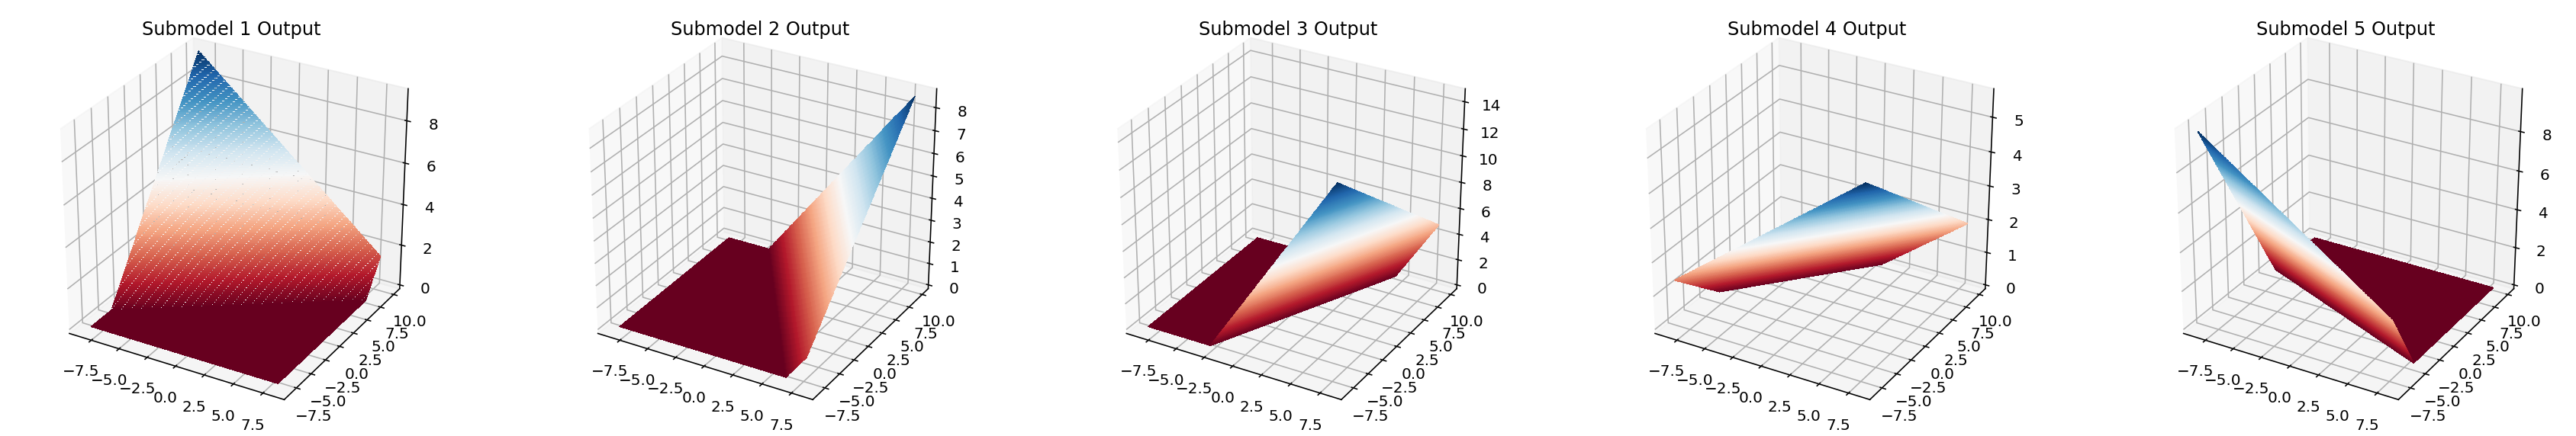

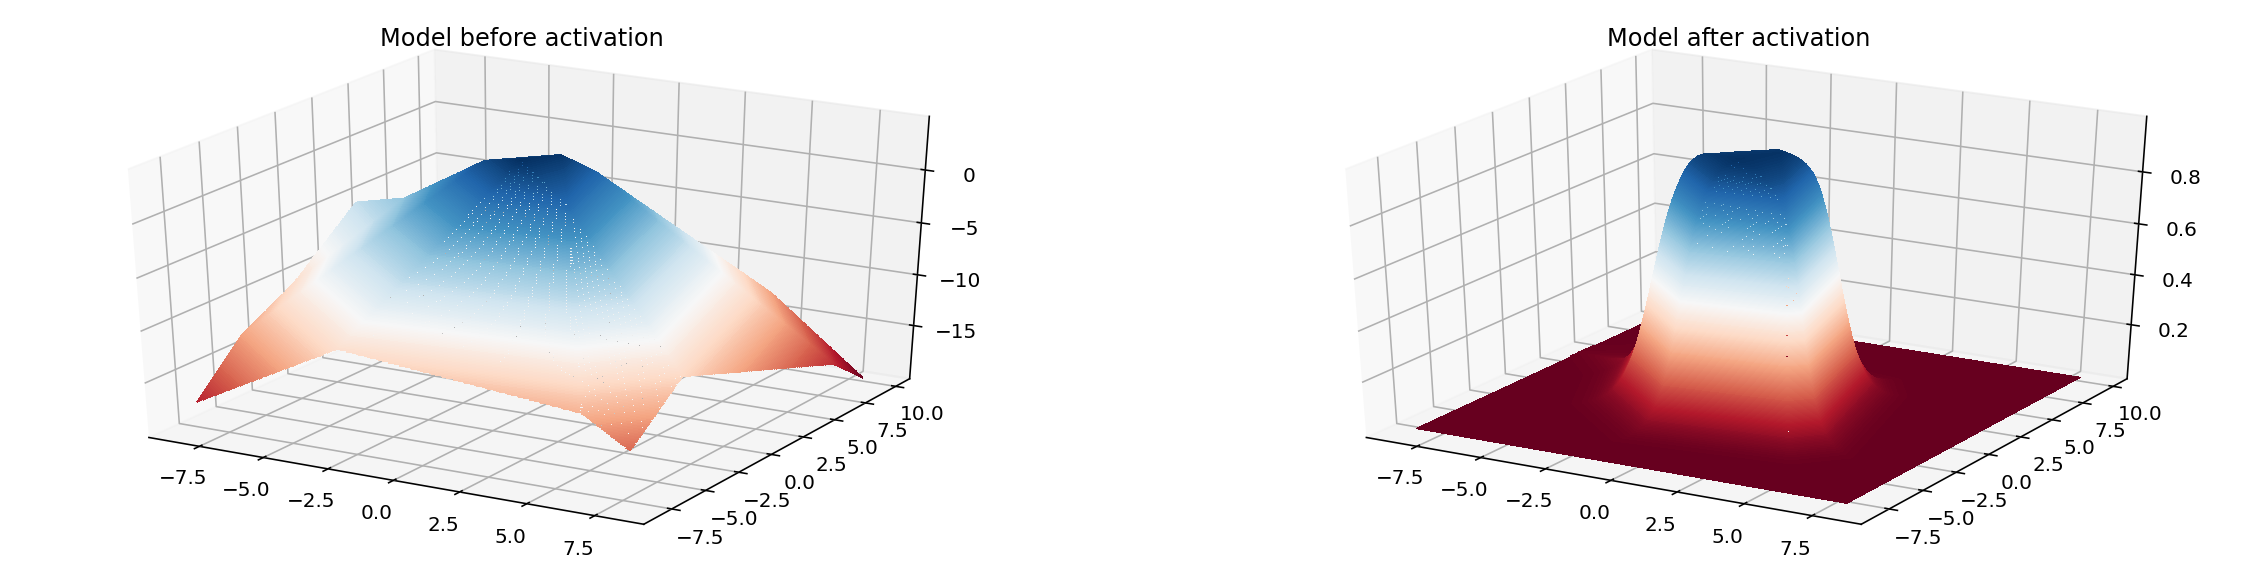

In [30]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(30,5))
Z_lr_sum = 0
for i in range(hidden_units):
    ax = fig.add_subplot(1, hidden_units, i+1, projection='3d')
    ax.contourf(X1, X2, Z_lr_array[i], 256, cmap=plt.cm.RdBu) #, cmap=cm_blues)
    ax.set_title(f'Submodel {i+1} Output')
    Z_lr_sum = Z_lr_sum + Z_lr_array[i]  * model.get_weights()[2][i][0] 
plt.show()
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.contourf(X1, X2, Z_lr_sum + model.get_weights()[3][0], 256, cmap=plt.cm.RdBu) #, cmap=cm_blues)
ax.set_title(f'Model before activation')
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.contourf(X1, X2, sigmoid(Z_lr_sum + model.get_weights()[3][0]), 256, cmap=plt.cm.RdBu)
ax.set_title(f'Model after activation')
plt.show()

In [31]:
# Notar que en los gráficos se ve que parece estar al reves.
model.get_weights()[2]

array([[-1.0318007 ,  0.9983854 , -0.6060694 , -0.9467582 ,  0.82766265,
        -0.9588451 , -0.99062926, -0.9626207 , -0.57836473, -0.7945283 ],
       [-1.9188668 ,  1.3263459 , -0.87191486, -1.3717636 ,  0.9940283 ,
        -1.3103124 , -0.39773092, -0.8199388 , -0.07455372, -1.3464208 ],
       [-1.1712728 ,  0.68026614, -0.52135336, -0.56443197,  0.2996456 ,
        -0.8526875 , -0.6898869 , -0.41043395,  0.56950873, -0.54349035],
       [ 1.9127382 , -0.93385553,  0.642192  ,  0.8758595 , -0.49165028,
         1.1411053 ,  0.70800006,  0.5139676 , -0.27975067,  0.8938214 ],
       [-2.0484443 ,  1.2789065 , -0.79674673, -1.4902494 ,  1.0393938 ,
        -1.2362534 , -0.92989784, -1.0649713 ,  0.47299978, -1.3773975 ]],
      dtype=float32)

In [32]:
model.get_weights()[3]

array([ 0.44128966, -0.9295174 ,  0.5942157 ,  1.0672206 , -0.89322406,
        0.6780546 ,  0.7700509 ,  1.057104  , -0.70061487,  0.8334149 ],
      dtype=float32)

In [33]:
# Por eso los pesos del siguiente submodelo (el que combina los dos) son negativos

# Espacio linealmente separable

# Para graficos 3d
conda install -c conda-forge ipympl
# If using JupyterLab
conda install nodejs
jupyter labextension install @jupyter-widgets/jupyterlab-manager
jupyter labextension install jupyter-matplotlib

In [ ]:
X_sub_preds = []
for i in range(hidden_units):
    X_sub_preds.append(sub_models[i].predict(X))

In [ ]:
# Calculamos la ubicación de las observaciones en el nuevo espacio
new_space = np.hstack(X_sub_preds)

In [ ]:
new_space.shape

(300, 5)

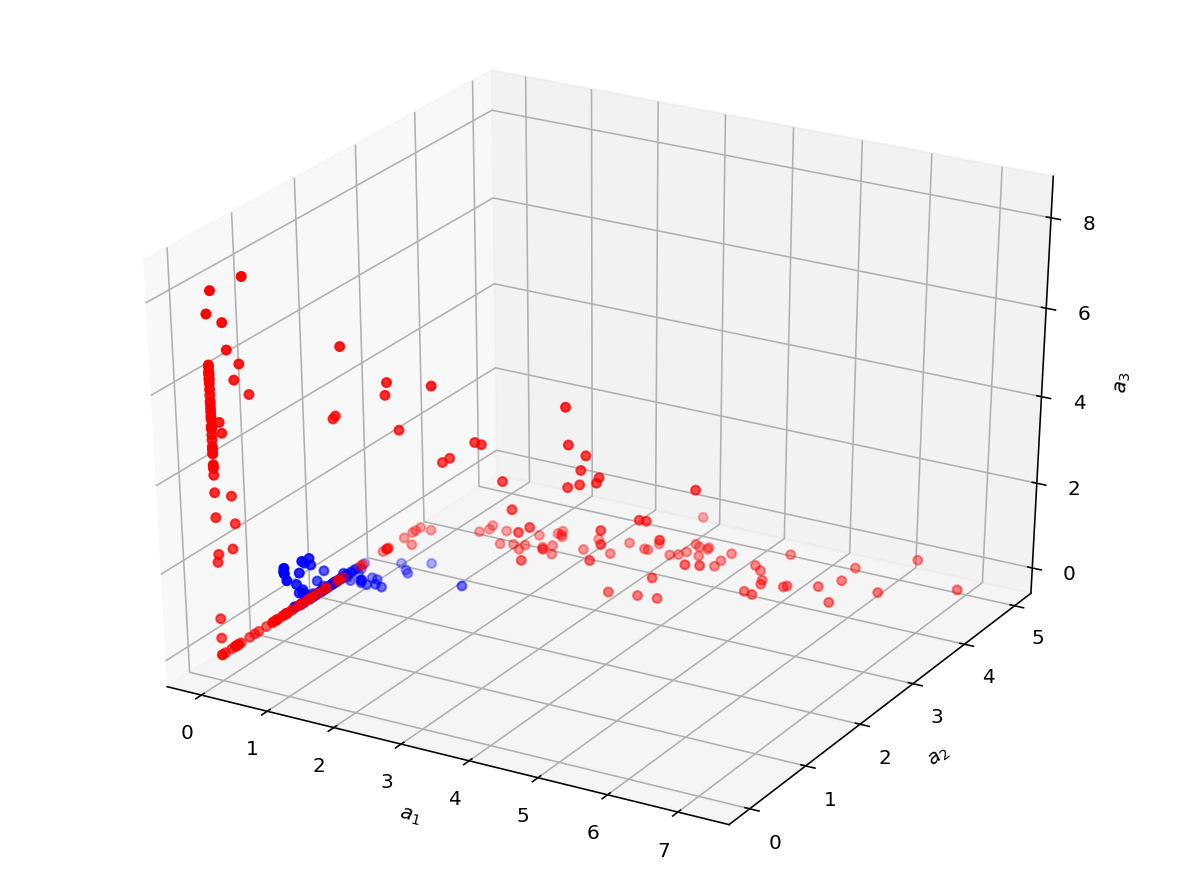

In [ ]:
# Graficamos los puntos en el nuevo espacio

if hidden_units == 2:
    plt.scatter(new_space[y==1,0], new_space[y==1,1])
    plt.scatter(new_space[y==0,0], new_space[y==0,1])
    plt.show()
else:
    fig = plt.figure(figsize=(8,6))
    ax = Axes3D(fig)
    ax.scatter(new_space[y==0,0], new_space[y==0,1], new_space[y==0,2], c='r')
    ax.scatter(new_space[y==1,0], new_space[y==1,1], new_space[y==1,2], c='b')
    ax.set_xlabel('$a_1$')
    ax.set_ylabel('$a_2$')
    ax.set_zlabel('$a_3$')

In [ ]:
# Creo el submodelo de la salida. Lleva sigmoidea por que es ya la predicción
sub_model_3 = get_sub_model(model, 0, 2, 3, activation='sigmoid', input_dim=hidden_units)

In [ ]:
sub_model_3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weights_3 = sub_model_3.get_weights()
weights_3

[array([[ 0.87714887],
        [-0.35126334],
        [ 0.73757553],
        [ 0.39106733],
        [-0.3004004 ]], dtype=float32), array([-0.8429226], dtype=float32)]

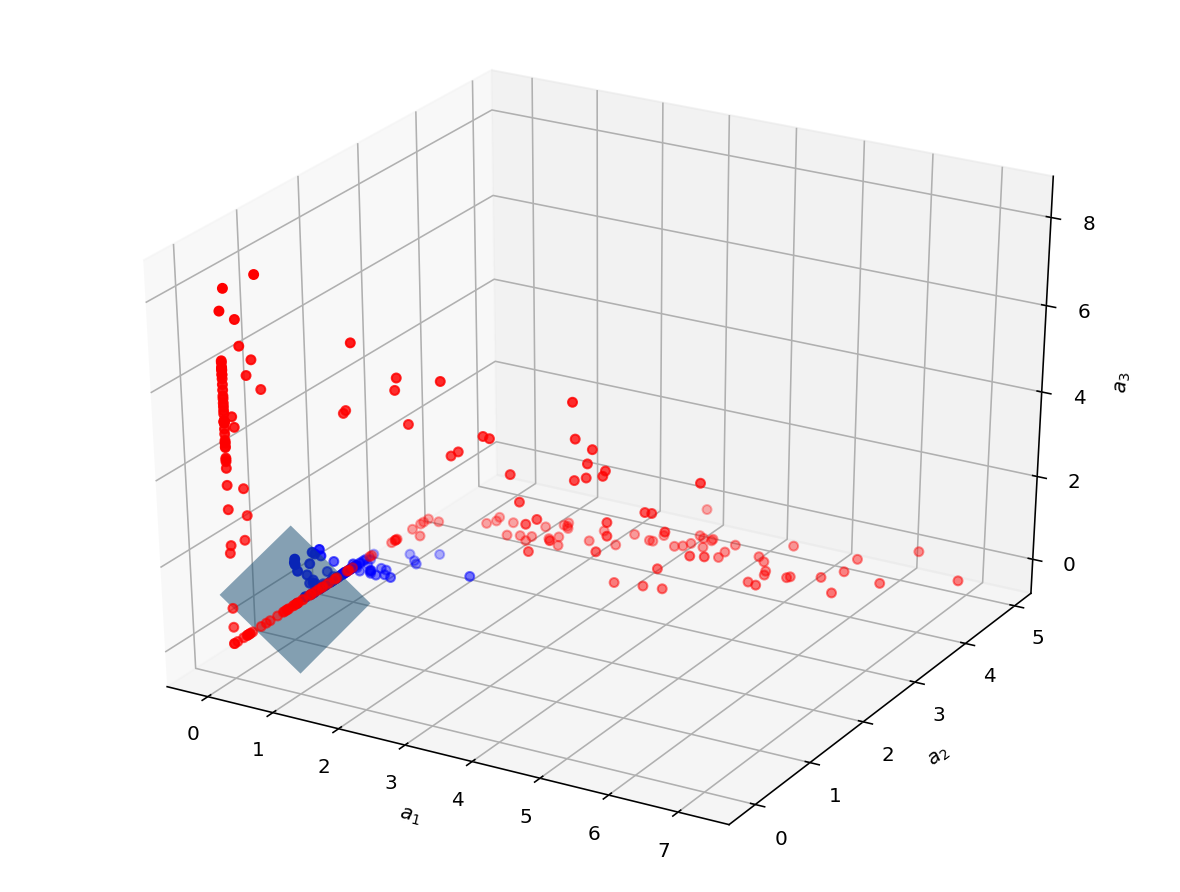

In [ ]:
if hidden_units == 2:
    plot_boundaries_keras(new_space, y, sub_model_3.evaluate(new_space,y)[1], probability_func=sub_model_3.predict_proba, h=0.2)
else:
    # %matplotlib widget
    N=2
    xi, yi = np.meshgrid(np.linspace(-0.1, 1.1, N), np.linspace(-0.1, 1.1, N))
    z = (- xi*weights_3[0][0, 0 ] - yi*weights_3[0][1, 0] - weights_3[1][0])/weights_3[0][2,0]
    z = z 
    fig = plt.figure(figsize=(8,6))
    ax = Axes3D(fig)
    ax.plot_surface(xi, yi, z, alpha= 0.5)
    ax.scatter(new_space[y==0,0], new_space[y==0,1], new_space[y==0,2], c='r')
    ax.scatter(new_space[y==1,0], new_space[y==1,1], new_space[y==1,2], c='b')
    # ax.view_init(elev=20., azim=60)
    ax.set_xlabel('$a_1$')
    ax.set_ylabel('$a_2$')
    ax.set_zlabel('$a_3$')
    plt.show()